<a href="https://colab.research.google.com/github/Amanverma783/Yes_bank_Closing_Price_prediction/blob/main/Closing_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Closing Price Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **By Aman Verma**

# **Project Summary -**

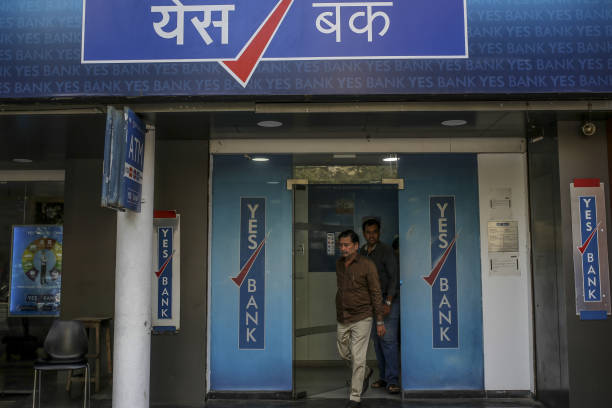

Write the summary here within 500-600 words.

The **"Yes Bank Stock Price Prediction"** project aims to create a robust machine learning model for forecasting the future price movements of Yes Bank's stock. By analyzing historical stock data and relevant financial indicators, the project seeks to provide valuable insights for investors and traders.

It involves **data collection, preprocessing, and feature engineering to create informative input features**. Various machine learning algorithms will be explored and evaluated to identify the most accurate predictive model.

**Data Collection:**

Gathered comprehensive stock data including Open, High, Low, and Close prices along with corresponding dates.

**Data Preprocessing:**

Cleaned and prepared the dataset.
**Addressed missing values and converted the 'Date' column to datetime format.**

**Exploratory Data Analysis (EDA):**

Conducted in-depth visual analysis to understand trends and patterns in Yes Bank closing prices.
Uncovered key insights into the historical performance of the stock.

**Outlier Identification:**

Applied the Interquartile Range (IQR) method to identify and visualize **outliers in Open, High, Low, and Close prices.**
Noted specific dates and values where outliers occurred.

**Model Building:**

Selected a predictive model, such as Linear Regression, for forecasting.
Executed a train-test split to evaluate the model's performance.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


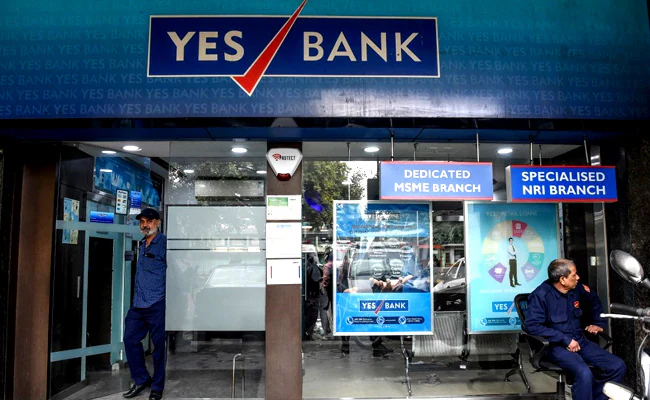

# **Write Problem Statement Here.**


**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.**

**Our main objective is to predict the stock’s closing price of the month.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
bank_df = pd.read_csv("/content/data_YesBank_StockPrices.csv")

### Dataset First View

In [ ]:
# Dataset First Look
bank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# Here showing in Dataset the Last Five rows
bank_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bank_df.shape

(185, 5)

**We have 185 rows and 5 columns**


In [ ]:
bank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

### Dataset Information

In [ ]:
# Dataset Info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


There are multiple variable in the dataset - **Date, Open, High and close The columns Open and Close represent the starting and final price.**

The **High, Low** variable are represent the **maximum and minimum.**

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(bank_df[bank_df.duplicated()])

0

**Do not have any duplicates in dataset**

#### **Missing Values/Null Values**

In [ ]:
# Missing Values/Null Values Count
bank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

No missing values in our dataset.

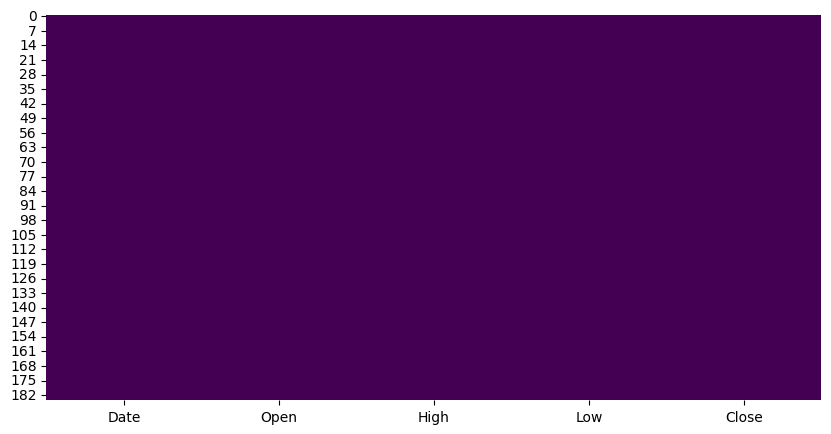

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(bank_df.isnull(), cmap='viridis', cbar=False)
plt.show()

we don't have any missing values

### **What did you know about your dataset?**

**Answer Here**


In [ ]:
#check dtype of date no
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Format and data type of date feature changed into datetime

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
bank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### **Variables Description**

**Answer Here**

##### Dataset we have 185 rows and 5 column. Here our dependent variable is Close and Independent variable is Open, High and Low


**Date :-** It denotes the month and year of the for a particular price.

**Open :-** Open means the price at which a stock started trading that month.

**High :-** refers to the maximum price that month.

**Low :-** refers to the minimum price that month.

**Close :-** refers to the final trading price for that month, which we have to predict using regression


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(bank_df.apply(lambda col: col.unique()))

Date     [Jul-05, Aug-05, Sep-05, Oct-05, Nov-05, Dec-0...
Open     [13.0, 12.58, 13.48, 13.2, 13.35, 13.49, 13.68...
High     [14.0, 14.88, 14.87, 14.47, 13.88, 14.44, 17.1...
Low      [11.25, 12.55, 12.27, 12.4, 12.88, 13.0, 13.58...
Close    [12.46, 13.42, 13.3, 12.99, 13.41, 13.71, 15.3...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

The Given Date in data is of format MMM-YY is converted to proper date of **YYYY-MM-DD.**

Since, Date column has dtype as object we've to convert it into datetime format

In [ ]:
bank_df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

In [ ]:
# converting 'Date' into datetime - YYYY-MM-DD
# required the changing data type of date

from datetime import datetime
bank_df['Date'] = bank_df['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

In [ ]:
#check dtype of date now
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


### **What all manipulations have you done and insights you found?**

**Answer Here.**

Our dataset comprises **185 rows and 5 columns**, featuring key metrics in the historical stock data for Yes Bank. The columns include **'Date', 'Open', 'High', 'Low', and 'Close'**. Notably, there are **no missing values in the dataset**, ensuring the integrity of our data.

In order to enhance the analysis and ensure consistency, we have undertaken the transformation of the 'Date' column. This involves **converting the existing date format to a standardized representation of 'YYYY-MM-DD'.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

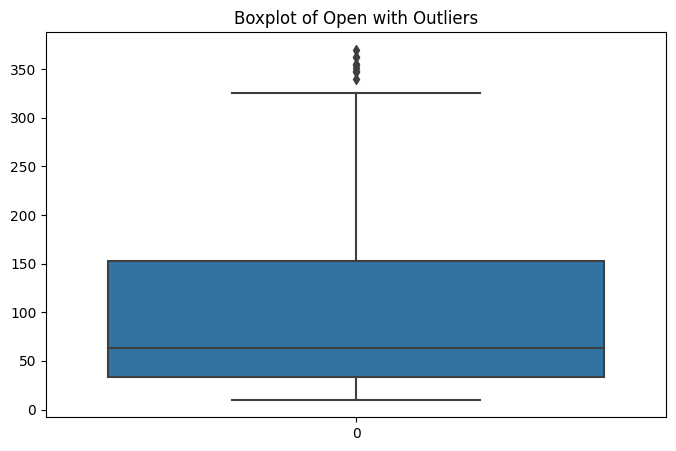

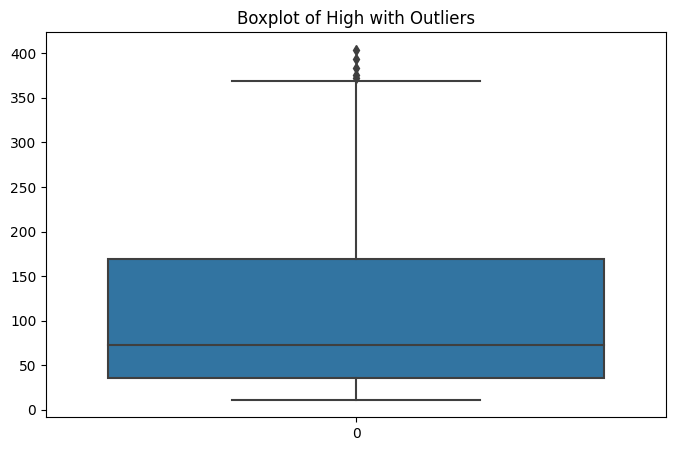

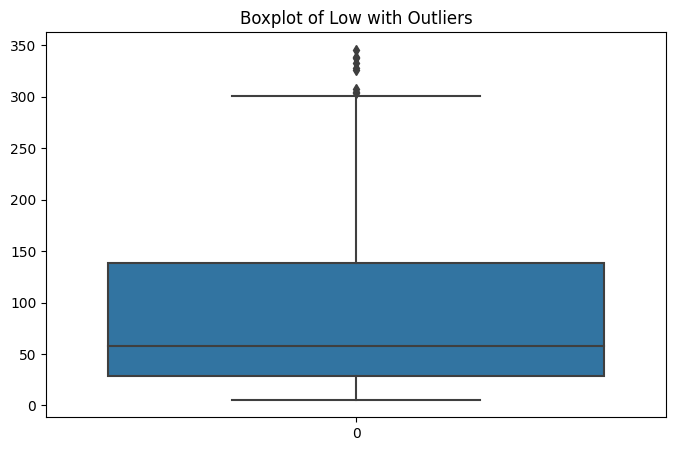

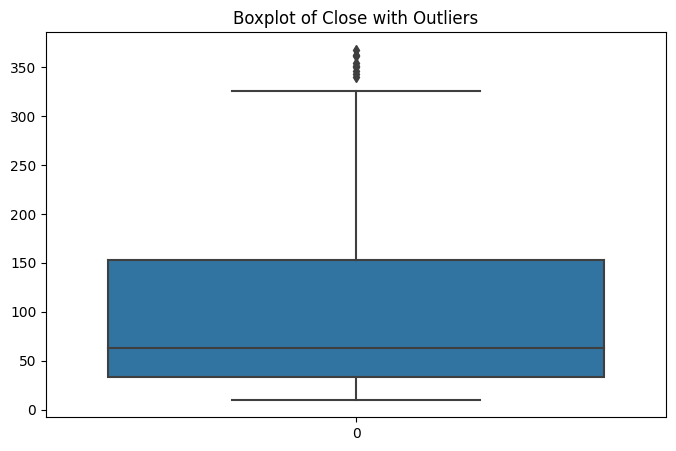

Outliers in Open column:


,Date,Open,High,Low,Close
145,2017-08-01,363.00,368.52,337.37,351.15
146,2017-09-01,351.00,383.25,345.50,350.00
147,2017-10-01,354.60,375.75,299.00,314.35
151,2018-02-01,355.00,366.50,304.65,322.25
154,2018-05-01,362.85,364.40,325.70,346.20
155,2018-06-01,348.00,350.10,327.35,339.60
156,2018-07-01,340.00,393.35,332.45,367.90
157,2018-08-01,369.95,404.00,338.00,343.40
158,2018-09-01,347.20,350.00,166.15,183.45


Outliers in High column:


,Date,Open,High,Low,Close
144,2017-07-01,293.04,372.00,290.78,361.96
146,2017-09-01,351.00,383.25,345.50,350.00
147,2017-10-01,354.60,375.75,299.00,314.35
156,2018-07-01,340.00,393.35,332.45,367.90
157,2018-08-01,369.95,404.00,338.00,343.40


Outliers in Low column:


,Date,Open,High,Low,Close
145,2017-08-01,363.00,368.52,337.37,351.15
146,2017-09-01,351.00,383.25,345.50,350.00
150,2018-01-01,314.00,366.00,307.35,354.45
151,2018-02-01,355.00,366.50,304.65,322.25
153,2018-04-01,305.00,368.75,303.30,362.05
154,2018-05-01,362.85,364.40,325.70,346.20
155,2018-06-01,348.00,350.10,327.35,339.60
156,2018-07-01,340.00,393.35,332.45,367.90
157,2018-08-01,369.95,404.00,338.00,343.40


Outliers in Close column:


,Date,Open,High,Low,Close
144,2017-07-01,293.04,372.00,290.78,361.96
145,2017-08-01,363.00,368.52,337.37,351.15
146,2017-09-01,351.00,383.25,345.50,350.00
150,2018-01-01,314.00,366.00,307.35,354.45
153,2018-04-01,305.00,368.75,303.30,362.05
154,2018-05-01,362.85,364.40,325.70,346.20
155,2018-06-01,348.00,350.10,327.35,339.60
156,2018-07-01,340.00,393.35,332.45,367.90
157,2018-08-01,369.95,404.00,338.00,343.40


In [ ]:
# Chart - 1 visualization code
def identify_outliers_iqr(data):
    outliers = {}
    for col in data.columns:
        if col != 'Date':  # Skip the 'Date' column
            # Calculate IQR for each column
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identify outliers
            outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

            # Visualize boxplots for each column
            plt.figure(figsize=(8, 5))
            sns.boxplot(data[col])
            plt.title(f'Boxplot of {col} with Outliers')
            plt.show()

    return outliers

# Identify and visualize outliers
outliers_dict = identify_outliers_iqr(bank_df)

# Display the outliers
for col, outliers in outliers_dict.items():
    if col != 'Date':  # Skip the 'Date' column
        print(f"Outliers in {col} column:")
        display(outliers)

**As we can see there are some outliers present in our data. We will need to deal with these before proceeding to modelling.**

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The specific chart chosen is a boxplot. Boxplots are effective for visualizing the distribution of data, particularly for identifying outliers.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The presence of outliers in each numerical variable, as indicated by points beyond the whiskers of the boxplots.
The extent of variability in each variable, providing a sense of the data's distribution.

#### Chart - 2

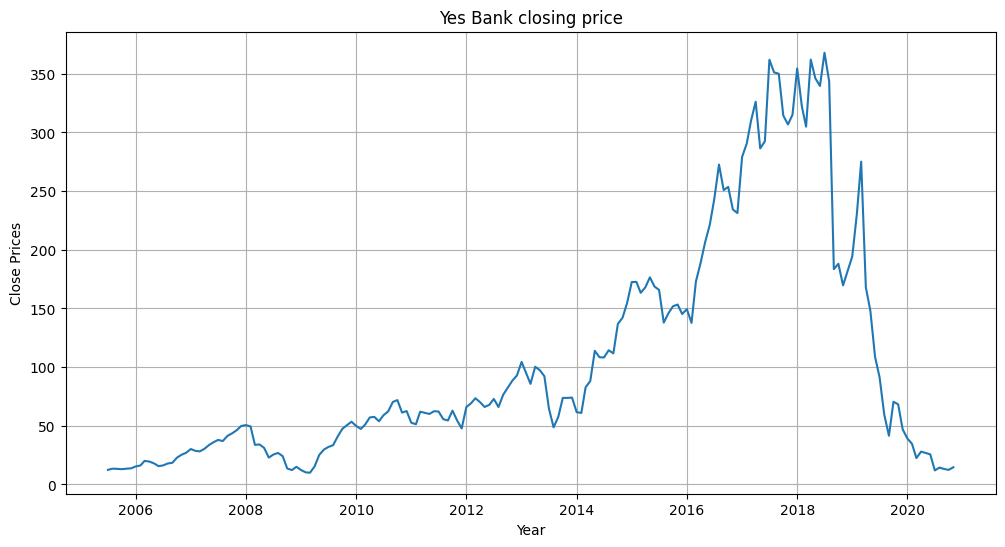

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Close Prices')
plt.plot(bank_df['Date'], bank_df['Close'])
plt.title('Yes Bank closing price')
plt.show()

##### **1. Why did you pick the specific chart?**

**Answer Here.**

This line plot was chosen to visualize the trend in the closing prices of the stock over time. It's suitable for time series data, helping to understand how the closing prices have changed.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The line plot visually represents the closing prices of the stock over time. From 2009 to 2018, there is a general increasing trend in closing prices, indicating potential positive performance and growth. However, after 2018, there is a significant decrease in the closing prices.

#### Chart - 3

**Dependent variable of close price of stock**

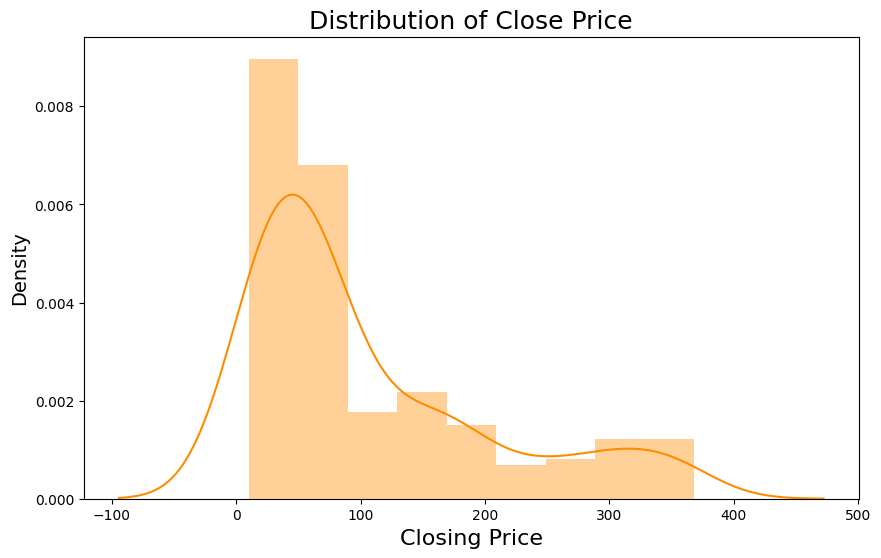

In [ ]:
# depndent variable is 'Close'
# Normal Distribution

plt.figure(figsize = (10,6))
sns.distplot(bank_df['Close'], color = 'DarkOrange')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It is Right Skewed Distirbution



##### **1. Why did you pick the specific chart?**

**Answer Here.**

The chosen chart effectively combines a histogram and KDE plot to provide a comprehensive view of the distribution of 'Close' prices

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The plot is right-skewed, meaning there are fewer instances of extremely high closing prices, making the distribution slightly skewed to the right.

#### Chart - 4

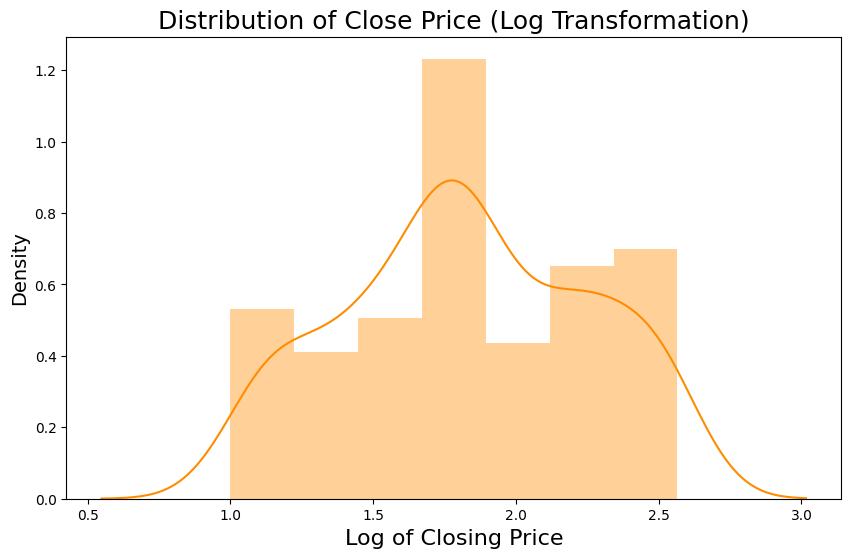

In [ ]:
# Distribution plot of closing price after applying log transformation

plt.figure(figsize=(10, 6))
sns.distplot(np.log10(bank_df['Close']), color='darkorange')
plt.title('Distribution of Close Price (Log Transformation)', fontsize=18)
plt.xlabel('Log of Closing Price', fontsize=16)
plt.ylabel('Density', fontsize=14)
plt.show()

After log transformation, distribution of closing price is more normal

chart - 5

# **Independent Variable Open , High and Low price of stock**


**Plotting distribution for numerical Features**

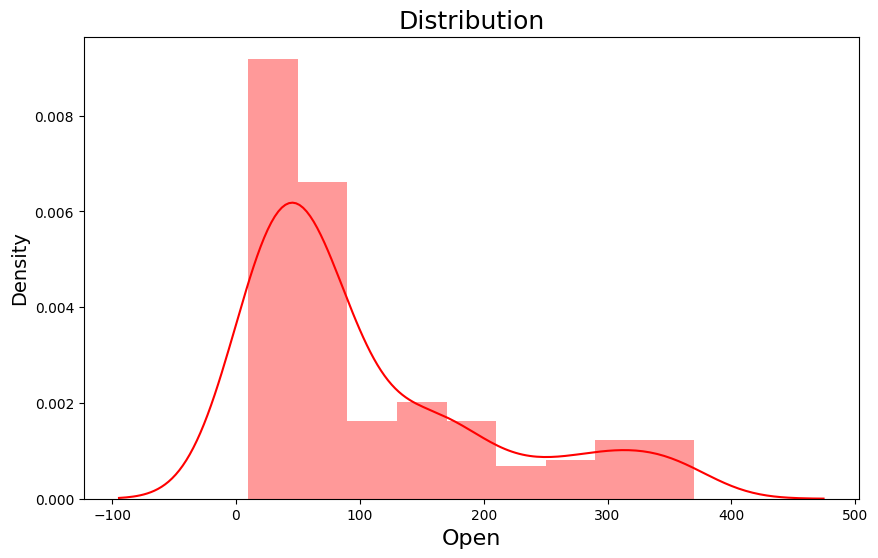

In [ ]:
# ploting for Distribution of 'open' Feature

plt.figure(figsize = (10,6))
sns.distplot(bank_df['Open'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


It looks for numerical features are rightly skewed.

Apply log transformation to make normal.

Chart - 6

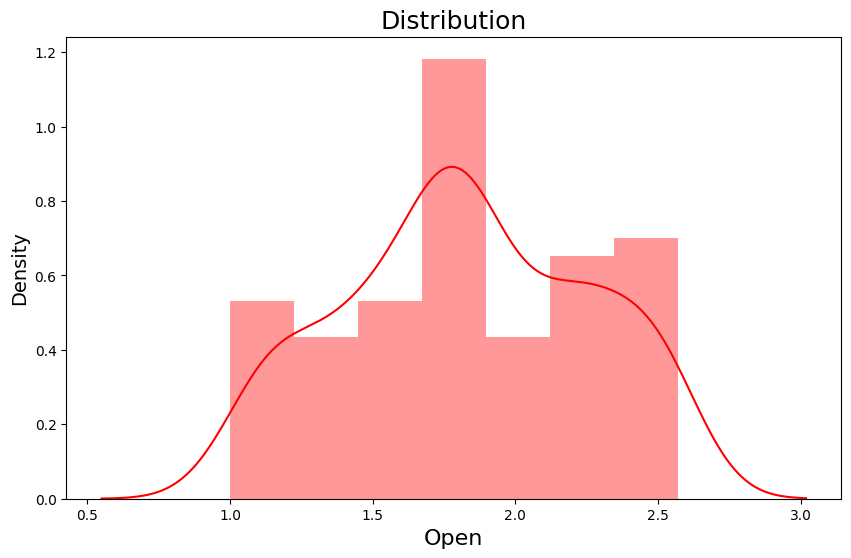

In [ ]:
# log transformation for 'open' feature

plt.figure(figsize = (10,6))
sns.distplot(np.log10(bank_df['Open']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks like Normally Distributed of open Feature

##### 1. Why did you pick the specific chart?

Answer Here.

The specific chart chosen is a distribution plot after applying a log transformation to the 'Open' feature. This choice is made to visually assess the impact of the log transformation on the data distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The insight from the chart is that the log transformation has successfully made the distribution of the 'Open' feature more like a normal distribution.This transformation is valuable for making the data more suitable for statistical analyses that assume a normal distribution.

Chart 7

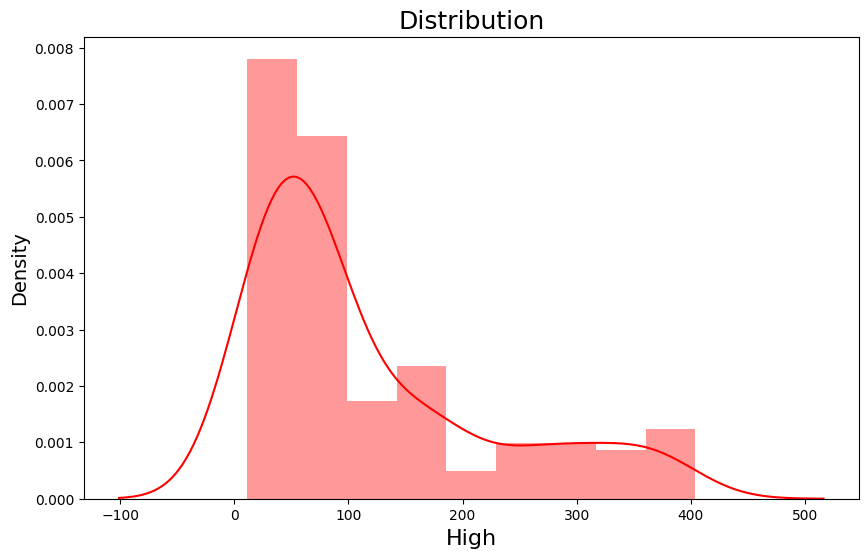

In [ ]:
# ploting for Distribution of 'high' Feature

plt.figure(figsize = (10,6))
sns.distplot(bank_df['High'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


It looks for numerical features are rightly skewed.

Apply log transformation to make normal.

##### 1. Why did you pick the specific chart?

Answer Here.

This plot is selected to visually assess the spread and frequency distribution of numerical values in the 'High' feature.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The insight from the chart is that the 'High' feature exhibits right-skewed distribution. This means that there is a higher concentration of lower values, and the tail of the distribution extends towards the higher values.

chart - 8

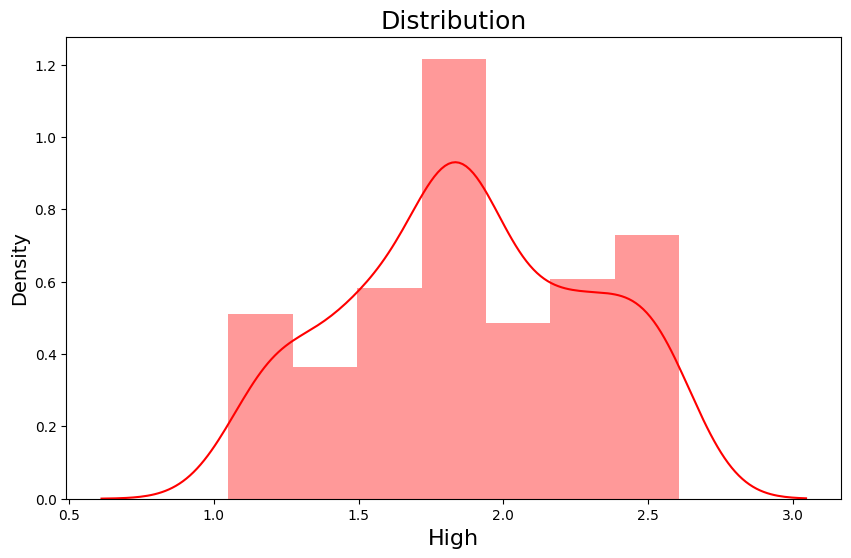

In [ ]:
# Log Transformation of 'High' Feature

plt.figure(figsize = (10,6))
sns.distplot(np.log10(bank_df['High']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

chart- 9

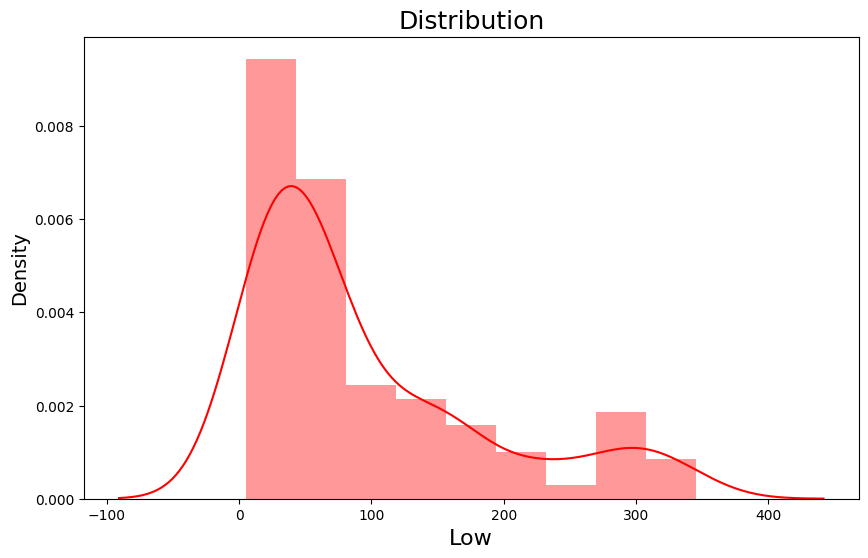

In [ ]:
# for Normal Distribution
# ploting for Distribution of 'Low' Feature

plt.figure(figsize = (10,6))
sns.distplot(bank_df['Low'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks for numerical features are rightly skewed.

Apply log transformation to make normal.

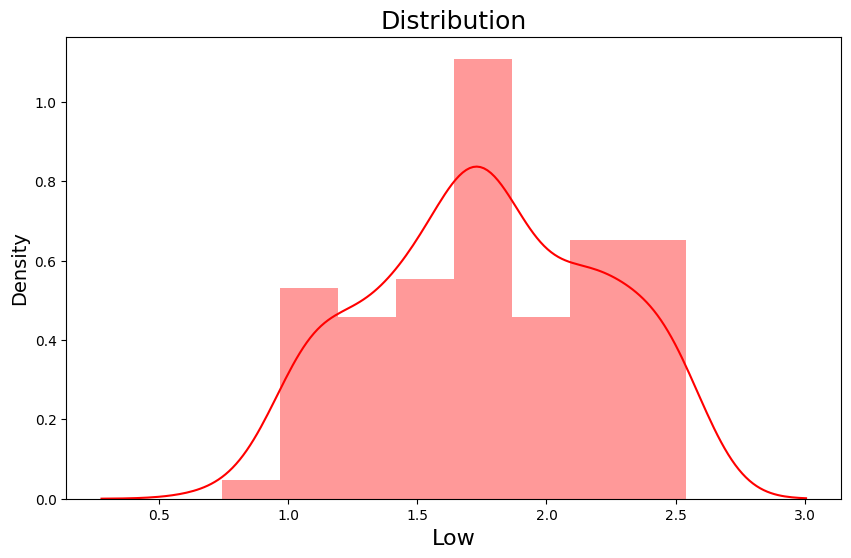

In [ ]:
# Log Transformation of 'low' feature
plt.figure(figsize = (10,6))
sns.distplot(np.log10(bank_df['Low']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks like Normally Distributed of Low Feature

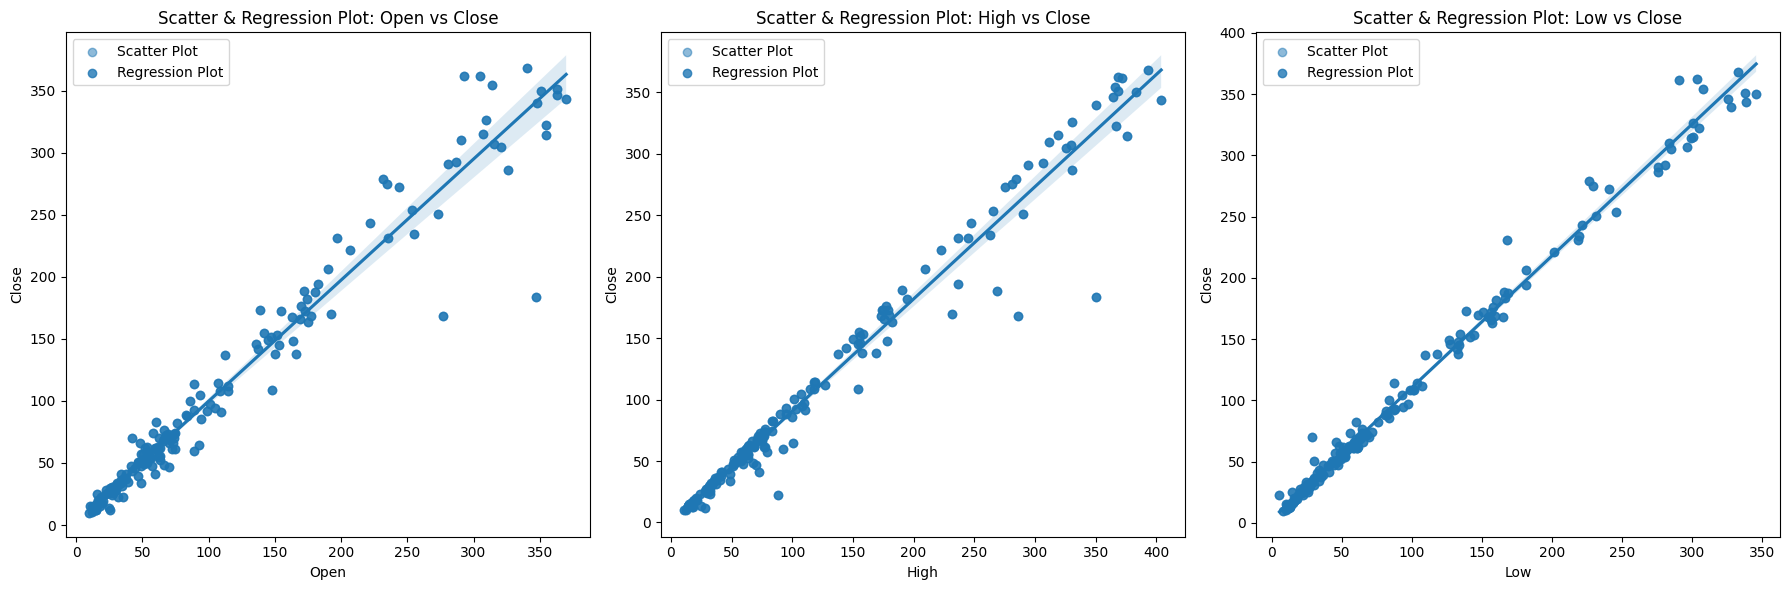

In [ ]:
# Now find out the realation between the Dependent Variable and independent Variable
# scatter plot with Best Fit line
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Columns to compare
columns_to_compare = ['Open', 'High', 'Low']

for i, column in enumerate(columns_to_compare):
    ax = axes[i]

    # Scatter plot
    ax.scatter(bank_df[column], bank_df['Close'], alpha=0.5, label='Scatter Plot')

    # Regression plot
    sns.regplot(x=column, y='Close', data=bank_df, ax=ax, label='Regression Plot')

    # Title and labels
    ax.set_title(f'Scatter & Regression Plot: {column} vs Close')
    ax.set_xlabel(column)
    ax.set_ylabel('Close')
    ax.legend()

plt.tight_layout()
plt.show()

We can see that all of our independent variables are highly correlated to the dependent variable.

And the relationship between dependent and independent variables is linear in nature.

# **Correlation**

Now, we will see the correlation between all the features in our data set

<Axes: >

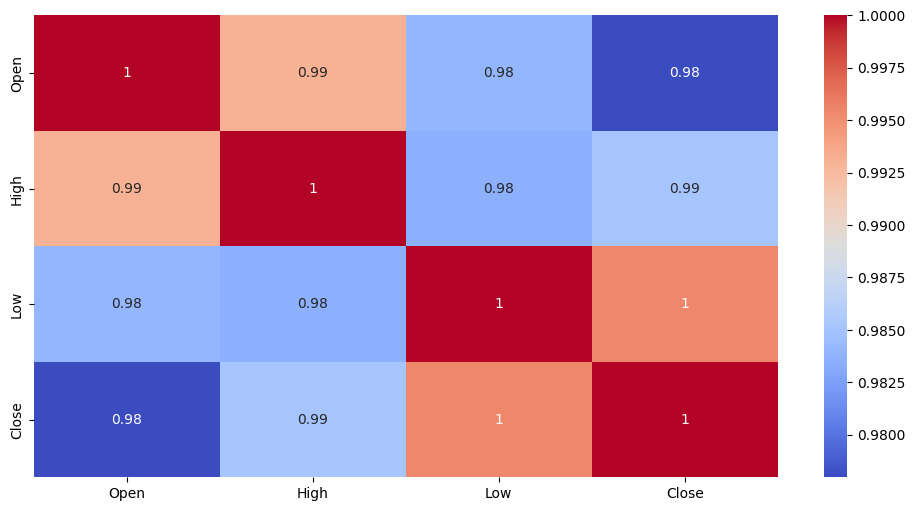

In [ ]:
# let's find out correlation with Heatmap
# correlation
plt.figure(figsize=(12,6))
correlation = bank_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')

From the heatmap above, we can clearly see that there is a very high correlation between each pair of features in our dataset. While it is desirable for the dependent variable to be highly correlated with independent variables, the independent varibles should ideally not have high correlation with one another.

# **Pair Plot**

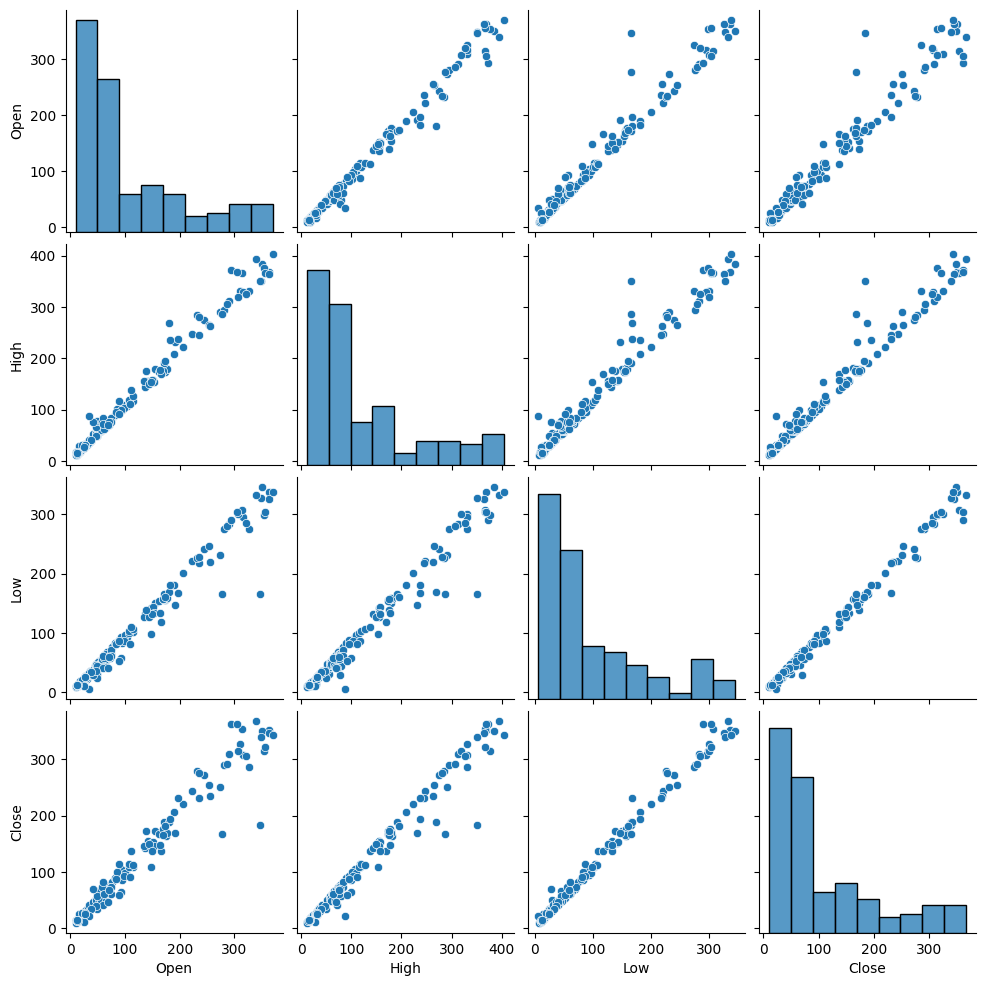

In [ ]:
# Pair Plot visualization code
# Let's visualise the relationship between each pair of variables using pair plots.
sns.pairplot(bank_df)


## **Feature Engineering & Data Pre-processing**

**1.  Multicollinearity Checking**

In [ ]:
# multicorrelinearity
# VIF( Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

In [ ]:
# Calculating VIF for independent variables
cal_vif(bank_df[[i for i in bank_df.describe().columns if i not in ['Date', 'Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values

We have the very High VIF of Open, High, Low fetures in our dataset so we have to drop them which is least correlated with dependent variable

In [ ]:
# Here we will drop the open feature from the VIF matrix
cal_vif(bank_df[[i for i in bank_df.describe().columns if i not in ['Date', 'Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


# **Train Test Split**

**Splitting Data**

**X =** Independent Variable

**y =** Dependent Variable

In [ ]:
# Splitting our data into Dependent and Independent Variables

X = bank_df.drop(columns=['Close','Date'])
y = bank_df['Close']

In [ ]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [ ]:
# splitting the dadaset into the training set and test set
# splitting the Train test data with 80 - 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
# Shape of the Training dataset
print(X_train.shape)

(148, 3)


In [ ]:
# Shape of the Test dataset
print(X_test.shape)

(37, 3)


 we build 5 regression models for our data.
* Linear Regression
* Lasso Rigression
* Ridge Rigression
* Elastic Net Regression
* XG Boost Regrression

#  **ML Model Implementation**

# **Linear Regression**

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

In [ ]:
## Create a Linear Regression model
regressor = LinearRegression()
# Train the model
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#train accuracy of linear regression model
round(regressor.score(X_train,y_train), 4)

0.8147

In [ ]:
# Test accuracy of linear regression model
round(regressor.score(X_test, y_test), 4)

0.8226

In [ ]:
#prediction of test data
y_pred = regressor.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# creating the DataFrame of test and train Dataset
train_Dataset = pd.DataFrame(X_train,y_train)
test_Dataset = pd.DataFrame(y_test)
test_Dataset.rename(columns= {'Close' :'Actual Closing Price'}, inplace =True)

In [ ]:
# Adding Predicted Closing Price
test_Dataset['Predicted Closing Price']= y_pred
test_Dataset.head()

,Actual Closing Price,Predicted Closing Price
16,1.403464,1.517387
179,1.408240,1.532118
66,1.720903,1.635190
40,1.088490,1.475394
166,2.170115,2.014715


In [ ]:
# Test Performance of Linear Regregression

print("MSE :", round(mean_squared_error(y_test, y_pred), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred)), 4))
print("MAE :", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE :", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("r2 :", round(r2_score(y_test, y_pred),4))

MSE : 0.0316
RMSE : 0.1777
MAE : 0.1513
MAPE : 0.0954
r2 : 0.8226


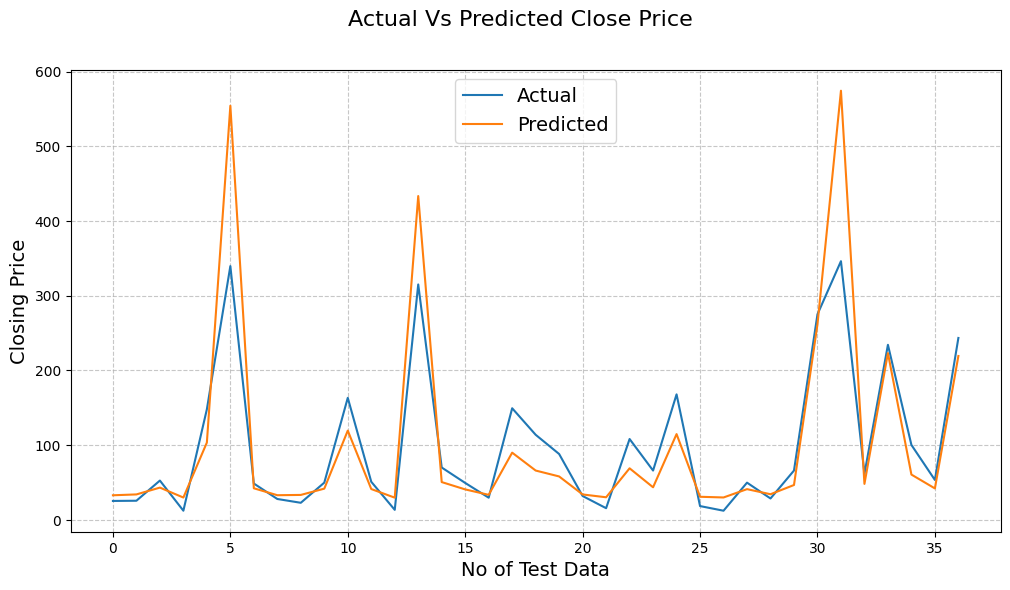

In [ ]:
# Actual Price vs predicted price for Linear Regression plot

plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs Predicted Close Price', fontsize=16)
plt.legend(['Actual', 'Predicted'], fontsize=14)
plt.xlabel('No of Test Data', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Ridge and Lasso Regression are types of Regularization techniques. Regularization techniques are used to deal with overfitting and when the dataset is large. Ridge and Lasso Regression involve adding penalties to the regression function.

# **Implementing Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
# Creating a Lasso Regression model
lasso = Lasso(alpha=0.005, max_iter = 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
# Accuracy of lasso regression model
round(lasso.score(X_train, y_train), 4)

0.8144

In [ ]:
# prediction of train data
y_pred_lasso = lasso.predict(X_test)

In [ ]:
y_pred_lasso

array([1.52055514, 1.53577312, 1.64073848, 1.48007004, 2.01461217,
       2.74090035, 1.63239804, 1.52091165, 1.52915367, 1.62459958,
       2.07755332, 1.61836076, 1.47805033, 2.62981621, 1.70703685,
       1.61429394, 1.52834077, 1.95620175, 1.81267257, 1.76363424,
       1.53587639, 1.48613456, 1.84020793, 1.63734843, 2.05819259,
       1.49501579, 1.48143852, 1.61577847, 1.53975454, 1.67409294,
       2.40045283, 2.75857291, 1.68748277, 2.3490824 , 1.78025847,
       1.62693942, 2.33097337])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance of lasso regression model

print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.032
RMSE : 0.179
MAE : 0.1523
MAPE : 0.0962
R2 : 0.82


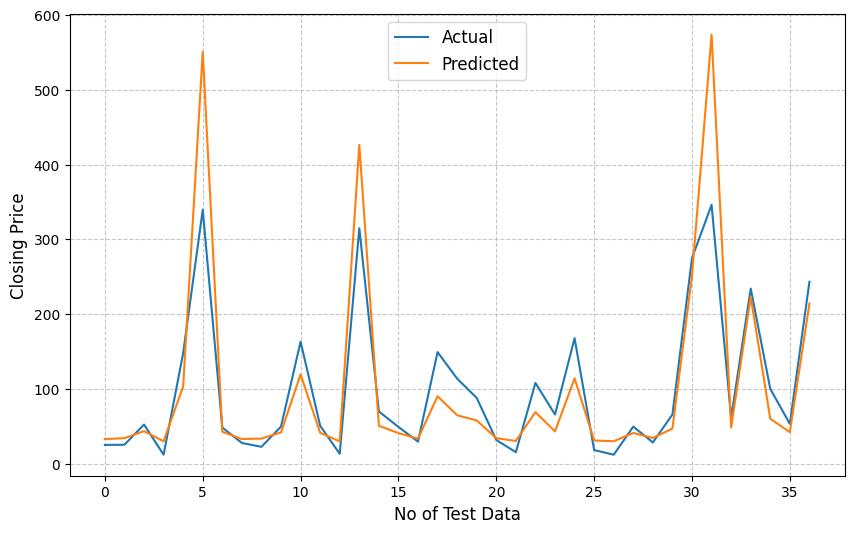

In [ ]:
# Actual price vs predicted price for lasso regression ploting
plt.figure(figsize=(10,6))

# Plotting the actual and predicted values
plt.plot(10**(np.array(y_test)), label='Actual')
plt.plot(10**(y_pred_lasso), label='Predicted')

# Adding legend and labels
plt.legend(['Actual', 'Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# **Implemeting Cross Validation of Lasso**

In [ ]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyper parameter of Tuning For Lasso Regression

lasso =Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print(" The best Fit alpha value is found to be :", round(lasso_regressor.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_regressor. best_score_,4))

 The best Fit alpha value is found out to be : 0.01
 The negative mean squared error is :  -0.0352


In [ ]:
# Prediction of test data .
y_pred_lasso1 = lasso_regressor.predict(X_test)
y_pred_lasso

array([1.52055514, 1.53577312, 1.64073848, 1.48007004, 2.01461217,
       2.74090035, 1.63239804, 1.52091165, 1.52915367, 1.62459958,
       2.07755332, 1.61836076, 1.47805033, 2.62981621, 1.70703685,
       1.61429394, 1.52834077, 1.95620175, 1.81267257, 1.76363424,
       1.53587639, 1.48613456, 1.84020793, 1.63734843, 2.05819259,
       1.49501579, 1.48143852, 1.61577847, 1.53975454, 1.67409294,
       2.40045283, 2.75857291, 1.68748277, 2.3490824 , 1.78025847,
       1.62693942, 2.33097337])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test performance

print("MSE :", round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)), 4))
print("MAE :", round(mean_absolute_error(y_test, y_pred_lasso), 4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso), 4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.032
RMSE : 0.179
MAE : 0.1523
MAPE : 0.0962
R2 : 0.82


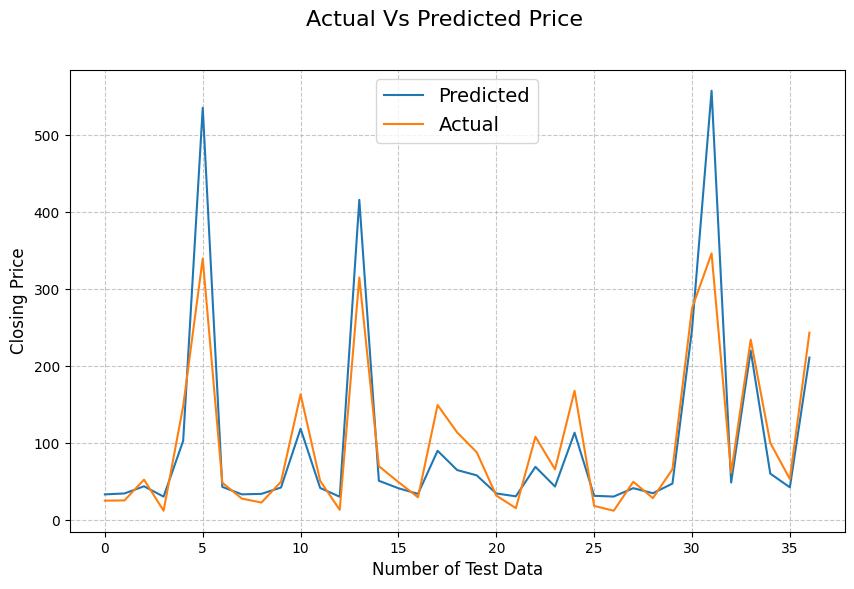

In [ ]:
# Actual Price vs Predicted Price for Lasso Regression with grid lines
plt.figure(figsize=(10,6))

# Plotting the predicted and actual values
plt.plot(10**(y_pred_lasso1), label='Predicted')
plt.plot(10**(np.array(y_test)), label='Actual')

# Adding legend and labels
plt.legend(['Predicted', 'Actual'], fontsize=14)
plt.xlabel('Number of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.suptitle('Actual Vs Predicted Price', fontsize=16)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# **Implementing Ridge Regression**

In [ ]:
# fit data into ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge (alpha= 0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# Accuracy of Ridge regression model
round(ridge.score(X_train, y_train), 4)

0.8147

In [ ]:
# prediction of test data
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([1.51725986, 1.53215164, 1.63600352, 1.47552735, 2.01524649,
       2.74546591, 1.6270459 , 1.51820847, 1.52403533, 1.62122179,
       2.07792883, 1.61563413, 1.47313494, 2.63727671, 1.7042382 ,
       1.61066104, 1.5249501 , 1.95487086, 1.81790128, 1.76386063,
       1.53181029, 1.48079356, 1.8391624 , 1.63839195, 2.06005015,
       1.49026998, 1.47689613, 1.61381392, 1.53558533, 1.66974486,
       2.41507786, 2.76158664, 1.68339463, 2.35025992, 1.78185548,
       1.62422136, 2.33989198])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance
print("MSE:", round(mean_squared_error (y_test, y_pred_ridge), 4))
print("RMSE:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_ridge), 4))
print("MAPE:", round(mean_absolute_percentage_error(y_test, y_pred_ridge), 4))
print("R2 :", round(r2_score(y_test, y_pred_ridge), 4))

MSE: 0.0317
RMSE: 0.1779
MAE: 0.1514
MAPE: 0.0955
R2 : 0.8221


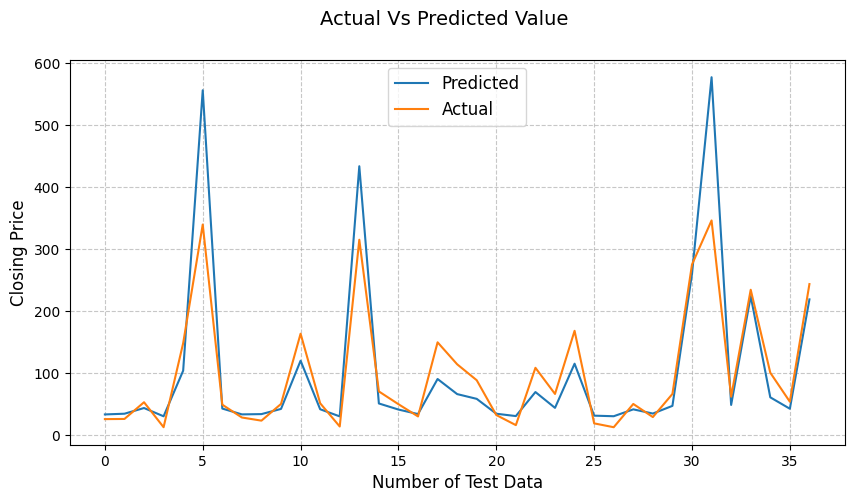

In [ ]:
# Actual Price vs Predicted Price for Ridge Regression with grid lines
plt.figure(figsize=(10,5))

# Plotting the predicted and actual values
plt.plot(10**(y_pred_ridge), label='Predicted')
plt.plot(10**(np.array(y_test)), label='Actual')

# Adding legend and labels
plt.legend(['Predicted', 'Actual'], fontsize=12)
plt.xlabel('Number of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.suptitle('Actual Vs Predicted Value', fontsize=14)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# **Implementing Cross Validation Of Ridge**

In [ ]:
# Hyperparameter of tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)

In [ ]:
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative mean squared error for is :", round(ridge_regressor.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 10
 The negative mean squared error for is : -0.035


In [ ]:
# Model Prediction
y_pred_ridge1 = ridge_regressor.predict(X_test)
y_pred_ridge1

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance
print("MSE:", round(mean_squared_error (y_test, y_pred_ridge1), 4))
print("RMSE:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge1)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_ridge1), 4))
print("MAPE:", round(mean_absolute_percentage_error(y_test, y_pred_ridge1), 4))
print("R2 :", round(r2_score(y_test, y_pred_ridge1), 4))

MSE: 0.0325
RMSE: 0.1804
MAE: 0.1531
MAPE: 0.0968
R2 : 0.8172


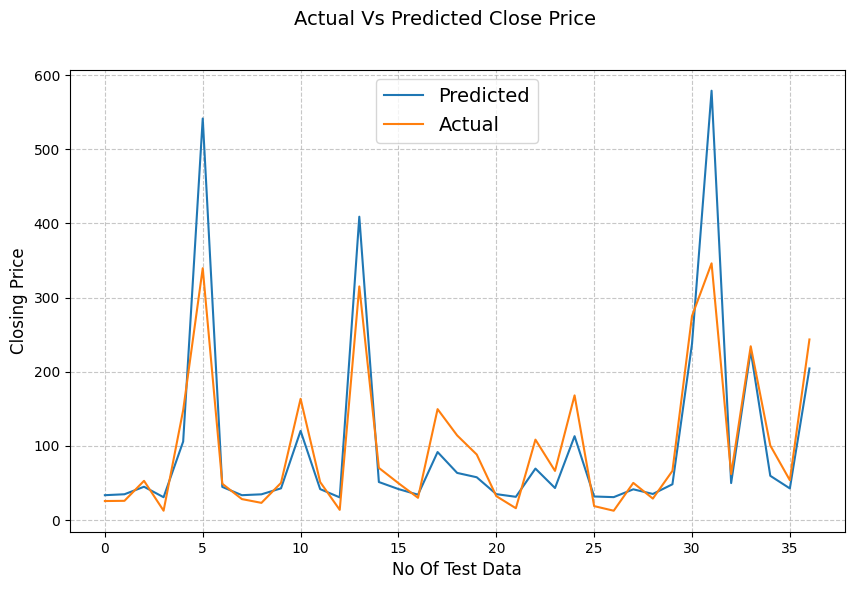

In [ ]:
# actual Price Vs Predicted Price for ridge regression
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_ridge1))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Close Price', fontsize = 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('No Of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize= 12)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In particular, in the fitting of linear or logistic regression models, the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods

# **Implementing Elastic Net**

In [ ]:
#fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.05)
elastic_model = elastic.fit(X_train,y_train)

In [ ]:
elastic.score(X_train,y_train)

0.8107386552145965

In [ ]:
y_pred_elastic = elastic.predict(X_test)

In [ ]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 4))

MSE : 0.0329
RMSE : 0.1815
MAE : 0.154
MAPE : 0.0978
R2 : 0.815


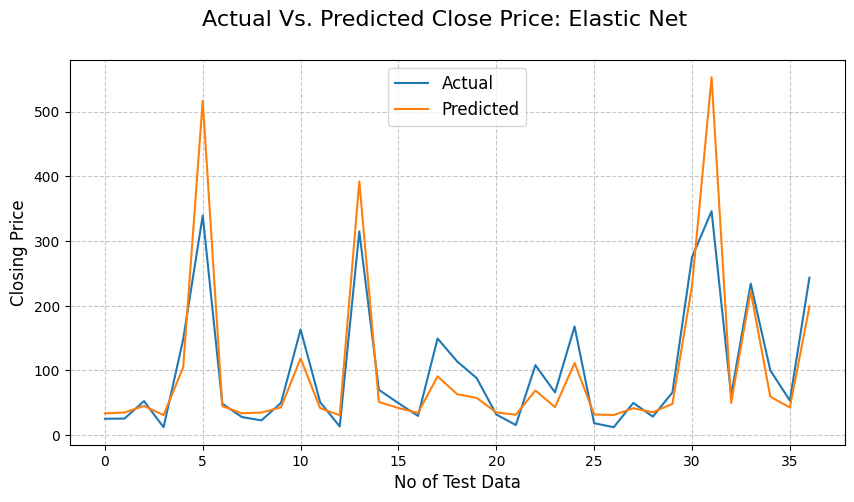

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# **Implementing Cross Validation of Elastic Net**

In [ ]:
# Hyper-Parameter Tuning for Elastic Net

elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model= GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=3)

In [ ]:
elastic_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model.best_params_['alpha'], elastic_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 1
The negative mean squared error for is:  -0.035


In [ ]:
y_pred_elastic1 = elastic_model.predict(X_test)
y_pred_elastic

array([1.52800375, 1.54363084, 1.6538612 , 1.49157484, 2.02054843,
       2.71355776, 1.65234854, 1.52805366, 1.5430137 , 1.63258347,
       2.07401048, 1.62153343, 1.48808712, 2.59363093, 1.71008334,
       1.62244504, 1.53642106, 1.95874914, 1.80151498, 1.76026465,
       1.54594285, 1.49916803, 1.83931208, 1.63644638, 2.04735111,
       1.50479474, 1.4930661 , 1.61873283, 1.54888066, 1.6844312 ,
       2.36273808, 2.742979  , 1.69862987, 2.34756703, 1.77455824,
       1.63103362, 2.29865142])

In [ ]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic1), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic1)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic1),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic1),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic1), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


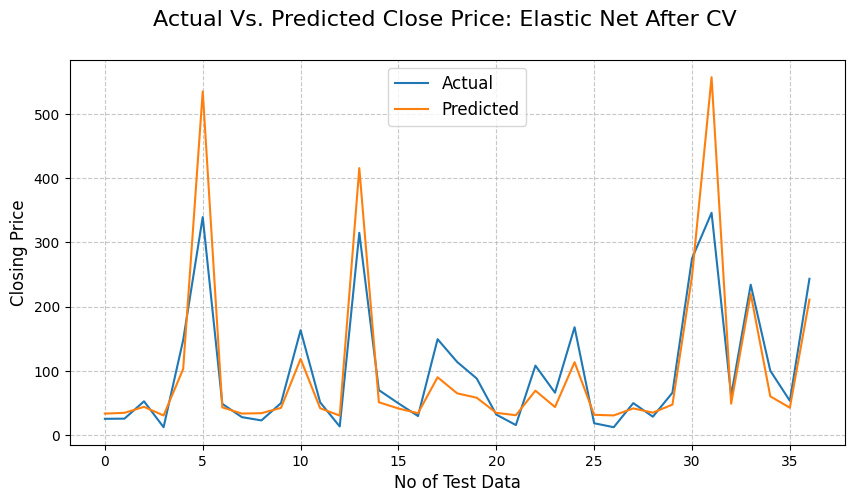

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic1))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# **XG Boost Regressor**

GBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

In [ ]:
# fitting the data into XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb.score(X_train,y_train)

0.9999831190668487

In [ ]:
y_pred_XG = xgb.predict(X_test)
y_pred_XG

array([1.3302083, 1.4298679, 1.7448986, 1.1393454, 2.1990924, 2.5257392,
       1.705133 , 1.3979783, 1.4293314, 1.6977211, 2.23678  , 1.6719453,
       1.0478789, 2.5015   , 1.8406694, 1.6738625, 1.3928678, 2.1458247,
       1.9986749, 1.9485542, 1.4585392, 1.1624377, 1.9935942, 1.7219703,
       2.187498 , 1.3033284, 1.1393454, 1.6771797, 1.4860153, 1.820094 ,
       2.441956 , 2.5207415, 1.8443613, 2.3416798, 1.9432185, 1.7582539,
       2.3644876], dtype=float32)

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance of XGBoost model after validation

print("MSE :",round(mean_squared_error(y_test, y_pred_XG), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_XG)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_XG),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_XG),4))
print("R2 :",round(r2_score(y_test, y_pred_XG), 4))

MSE : 0.0018
RMSE : 0.0424
MAE : 0.0347
MAPE : 0.0221
R2 : 0.9899


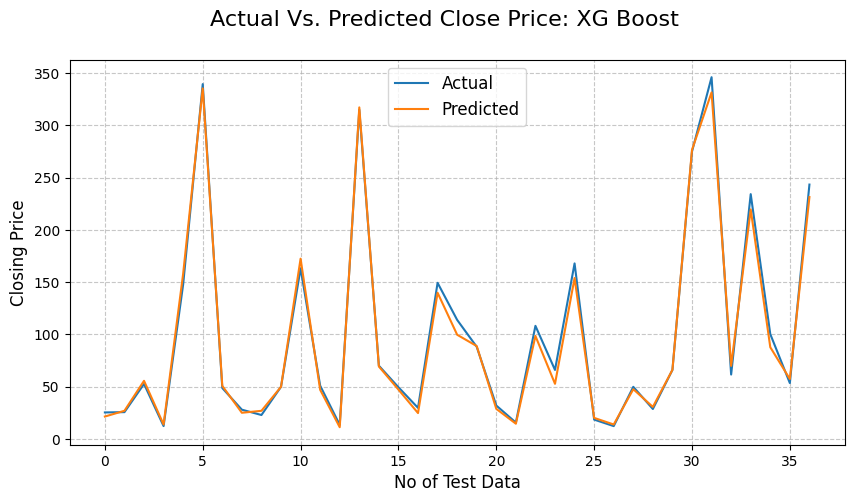

In [ ]:
# Actual Price vs. Predicted Price for XGBoost after Validation Plotting with Grid Lines

# Set the size of the figure
plt.figure(figsize=(10,5))

# Plotting the Actual vs Predicted values
plt.plot(10**(np.array(y_test)), label='Actual')
plt.plot(10**(y_pred_XG), label='Predicted')

# Title and labels for the axes
plt.suptitle('Actual Vs. Predicted Close Price: XG Boost', fontsize=16)
plt.legend(fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Write the conclusion here.**

1. The popularity of stock closing is growing extremely rapidly day by day   which encourage researcher to find new methods if any fraud happens.

2. This technique is used for prediction is not only helpful to researchers to predict future stock closing prices or any fraud happen or not but also helps investors or any person who dealing with the stock market in order to prediction of model with good accuracy.

3. In this work we use linear regression technique, lasso regression, ridge regression, elastic net regression and XGBoost Regression technique. these five models gives us the following results

4. High, low, open are directly correlate with the closing price of stocks

5. Target variable(dependent variable) strongly dependent on independent variables

6. Xgboost regression is best model for yes bank stock closing price data this model use for further prediction


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***